In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


In [2]:
def histogram_grid(data):
    column_names_except_last = data.columns[:-1].tolist()

    # Determine the number of rows and columns for the grid
    num_cols = len(column_names_except_last)
    num_rows = (num_cols + 1) // 2  # Add 1 to make sure the last subplot is used if there's an odd number

    # Create subplots in a grid
    fig, axes = plt.subplots(num_rows, 2, figsize=(12, 7 * num_rows))
    fig.subplots_adjust(hspace=0.5)  # Adjust vertical spacing

    # Iterate through columns and create histograms
    for i, f in enumerate(column_names_except_last):
        row = i // 2
        col = i % 2
        ax = axes[row, col]
        ax.hist(data[f], bins=50)
        ax.grid()
        ax.set_title(f)
        ax.set_xlabel(f)
        ax.set_ylabel('Frequency')

    # Remove empty subplots if necessary
    if num_cols % 2 != 0:
        fig.delaxes(axes[num_rows - 1, 1])

    plt.show()


In [3]:
data = pd.read_csv("../dataset/classast-pha.csv")

In [4]:
data.describe()

a (AU)            e      i (deg)      w (deg)   Node (deg)  \
count  1748.000000  1748.000000  1748.000000  1748.000000  1748.000000   
mean      1.745759     0.527417    13.312400   180.497546   172.251967   
std       0.690729     0.179629    11.614397    99.661178   102.737794   
min       0.635223     0.025425     0.146084     0.521838     0.136042   
25%       1.265084     0.408588     4.875430    95.635077    82.401816   
50%       1.698290     0.549531     9.315508   185.986518   168.528048   
75%       2.179176     0.653530    18.796947   266.913890   256.374858   
max      17.818679     0.956042    75.412403   359.662669   359.854602   

           M (deg)       q (AU)       Q (AU)       P (yr)      H (mag)  \
count  1748.000000  1748.000000  1748.000000  1748.000000  1748.000000   
mean    180.809702     0.756564     2.735000     2.423793    19.966796   
std     107.280935     0.221101     1.344958     2.088742     1.506929   
min       0.052165     0.092800     0.960000     0.510000    14.100000   
25%      83.230489     0.617025     1.767500     1.420000    19.100000   
50%     182.880959     0.815600     2.605000     2.210000    20.200000   
75%     275.895719     0.936075     3.580000     3.220000    21.200000   
max     359.825201     1.060100    34.680000    75.220000    22.400000   

         MOID (AU)  
count  1748.000000  
mean      0.023348  
std       0.014309  
min       0.000010  
25%       0.011070  
50%       0.022994  
75%       0.034802  
max       0.049987

In [5]:
data.shape

(1748, 12)

In [6]:
data.head()

a (AU)         e    i (deg)     w (deg)  Node (deg)     M (deg)  q (AU)  \
0  1.078066  0.826854  22.825495   31.382966   88.010681  215.528772  0.1867   
1  1.245304  0.335342  13.337482  276.893024  337.207958  104.155607  0.8277   
2  1.470264  0.559922   6.352995  285.852564   35.736768  174.626213  0.6470   
3  1.776025  0.650141  39.832538  267.791993  356.903343  173.188556  0.6214   
4  1.874123  0.764602   1.326399   43.388048  349.694944  235.158622  0.4412   

   Q (AU)  P (yr)  H (mag)  MOID (AU) class  
0    1.97    1.12    16.90   0.034507  APO*  
1    1.66    1.39    15.60   0.030669  APO*  
2    2.29    1.78    16.25   0.025795  APO*  
3    2.93    2.37    15.20   0.003551  APO*  
4    3.31    2.57    18.80   0.011645  APO*

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1748 entries, 0 to 1747
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   a (AU)      1748 non-null   float64
 1   e           1748 non-null   float64
 2   i (deg)     1748 non-null   float64
 3   w (deg)     1748 non-null   float64
 4   Node (deg)  1748 non-null   float64
 5   M (deg)     1748 non-null   float64
 6   q (AU)      1748 non-null   float64
 7   Q (AU)      1748 non-null   float64
 8   P (yr)      1748 non-null   float64
 9   H (mag)     1748 non-null   float64
 10  MOID (AU)   1748 non-null   float64
 11  class       1748 non-null   object 
dtypes: float64(11), object(1)
memory usage: 164.0+ KB


In [8]:
class_names = data['class'].unique()
class_names

array(['APO*', 'ATE*', 'AMO*', 'APO', 'IEO*', 'ATE'], dtype=object)

In [9]:
#missing values

In [10]:
data.isna().any().any()
#no missing values

False

In [11]:
atribute_list = list(data.columns)
atribute_list

['a (AU)',
 'e',
 'i (deg)',
 'w (deg)',
 'Node (deg)',
 'M (deg)',
 'q (AU)',
 'Q (AU)',
 'P (yr)',
 'H (mag)',
 'MOID (AU)',
 'class']

In [12]:
class_distribution = data['class'].value_counts()

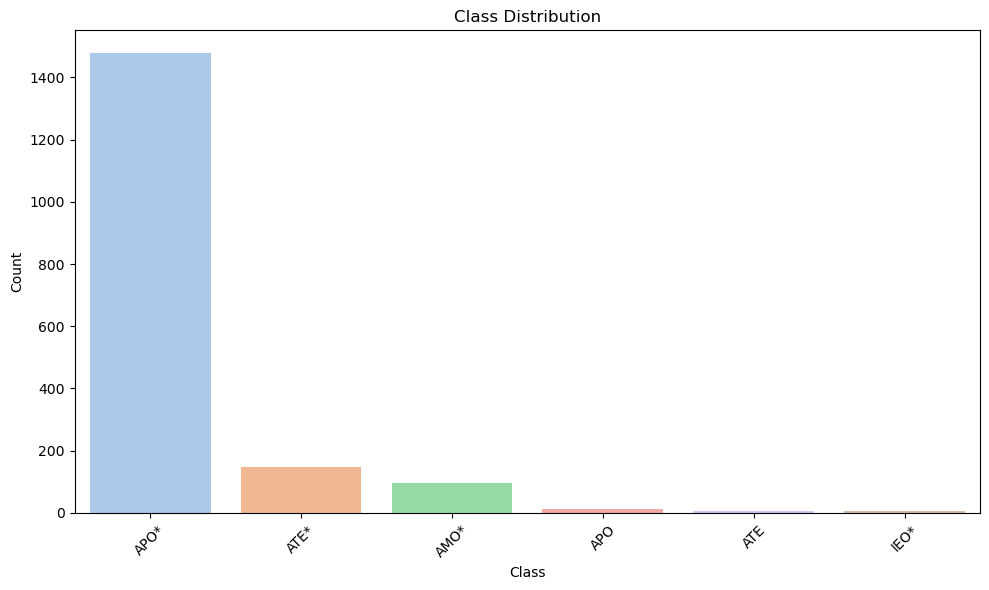

In [13]:
plt.figure(figsize = (10, 6))
sns.barplot(x = class_distribution.index, y = class_distribution.values, palette = "pastel")
plt.xticks(rotation = 45)

plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [14]:
print(data['class'].value_counts())

class
APO*    1477
ATE*     149
AMO*      96
APO       14
ATE        7
IEO*       5
Name: count, dtype: int64


In [15]:
#uneven class distribution -> stratify is needed 
#maybe drop lines for IEO class

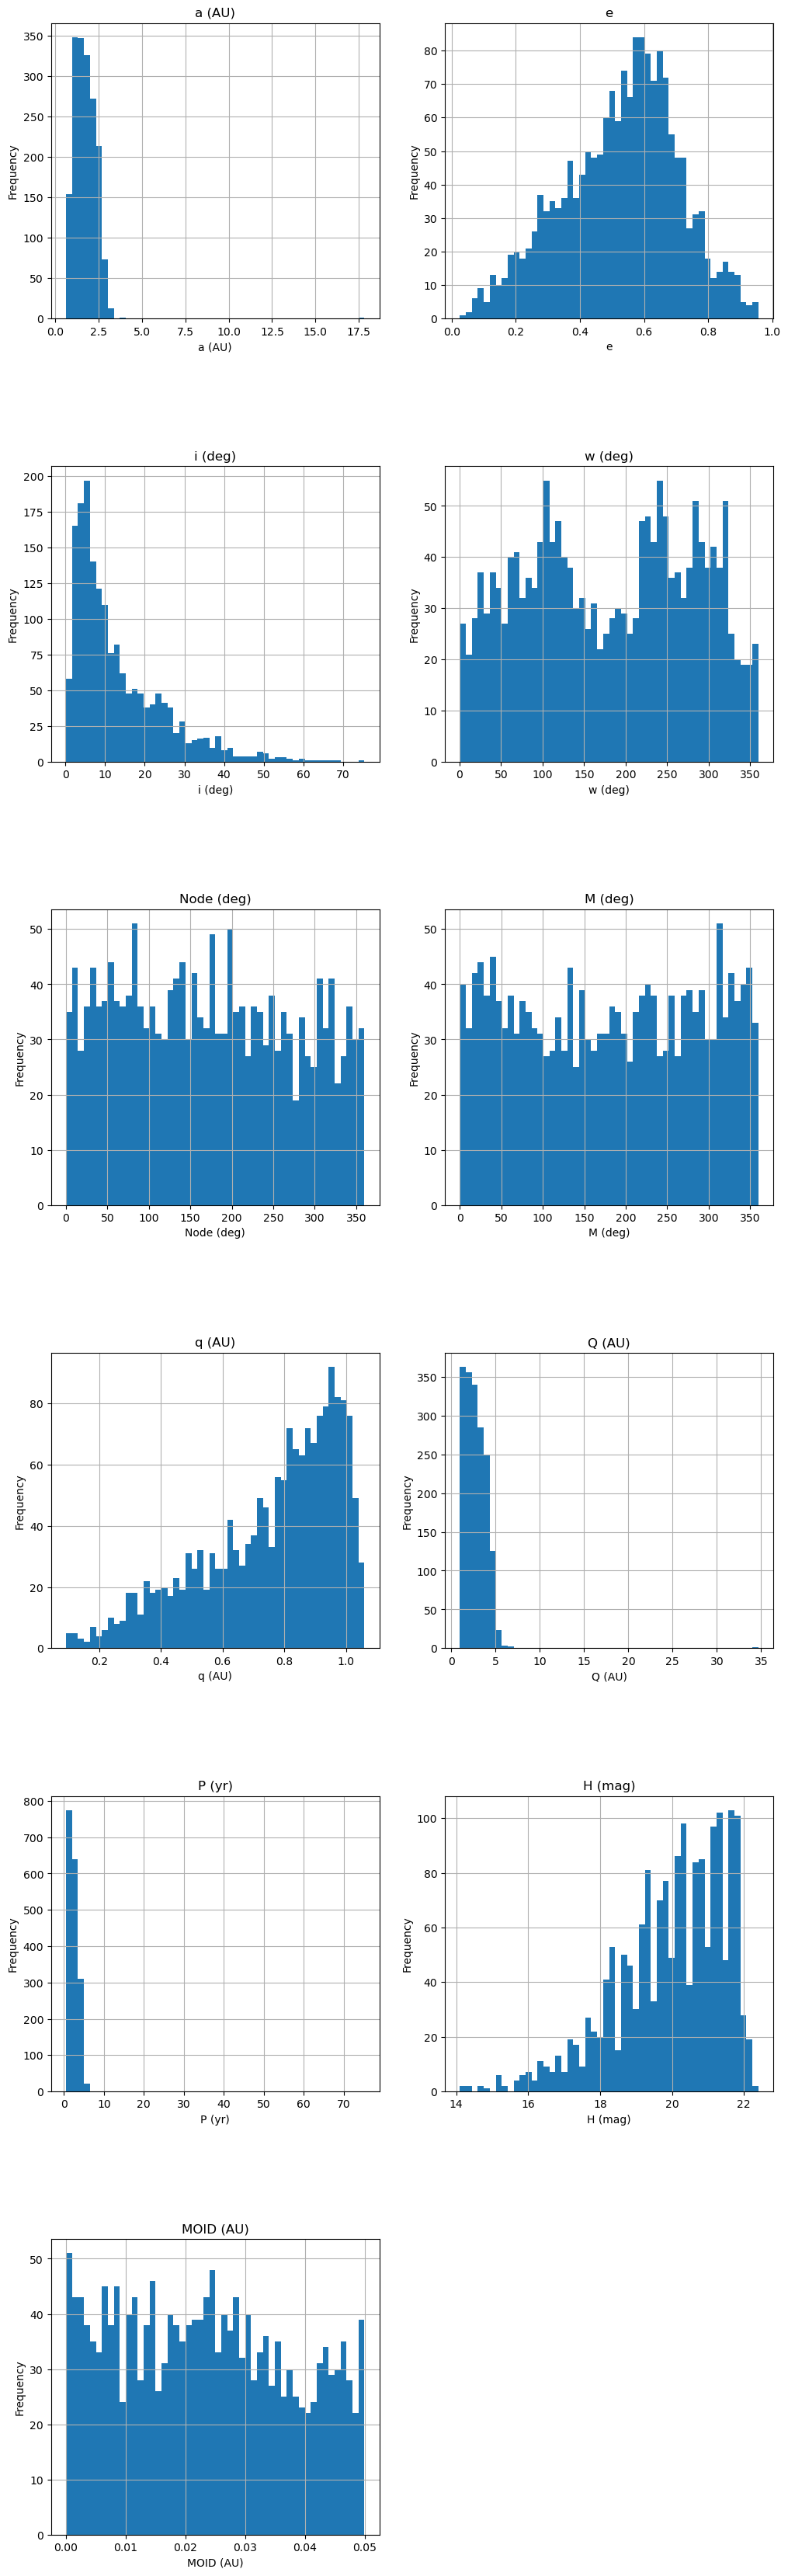

In [16]:
histogram_grid(data)

In [17]:
numeric_data = data.iloc[:, :-1]
numeric_data.head()

a (AU)         e    i (deg)     w (deg)  Node (deg)     M (deg)  q (AU)  \
0  1.078066  0.826854  22.825495   31.382966   88.010681  215.528772  0.1867   
1  1.245304  0.335342  13.337482  276.893024  337.207958  104.155607  0.8277   
2  1.470264  0.559922   6.352995  285.852564   35.736768  174.626213  0.6470   
3  1.776025  0.650141  39.832538  267.791993  356.903343  173.188556  0.6214   
4  1.874123  0.764602   1.326399   43.388048  349.694944  235.158622  0.4412   

   Q (AU)  P (yr)  H (mag)  MOID (AU)  
0    1.97    1.12    16.90   0.034507  
1    1.66    1.39    15.60   0.030669  
2    2.29    1.78    16.25   0.025795  
3    2.93    2.37    15.20   0.003551  
4    3.31    2.57    18.80   0.011645

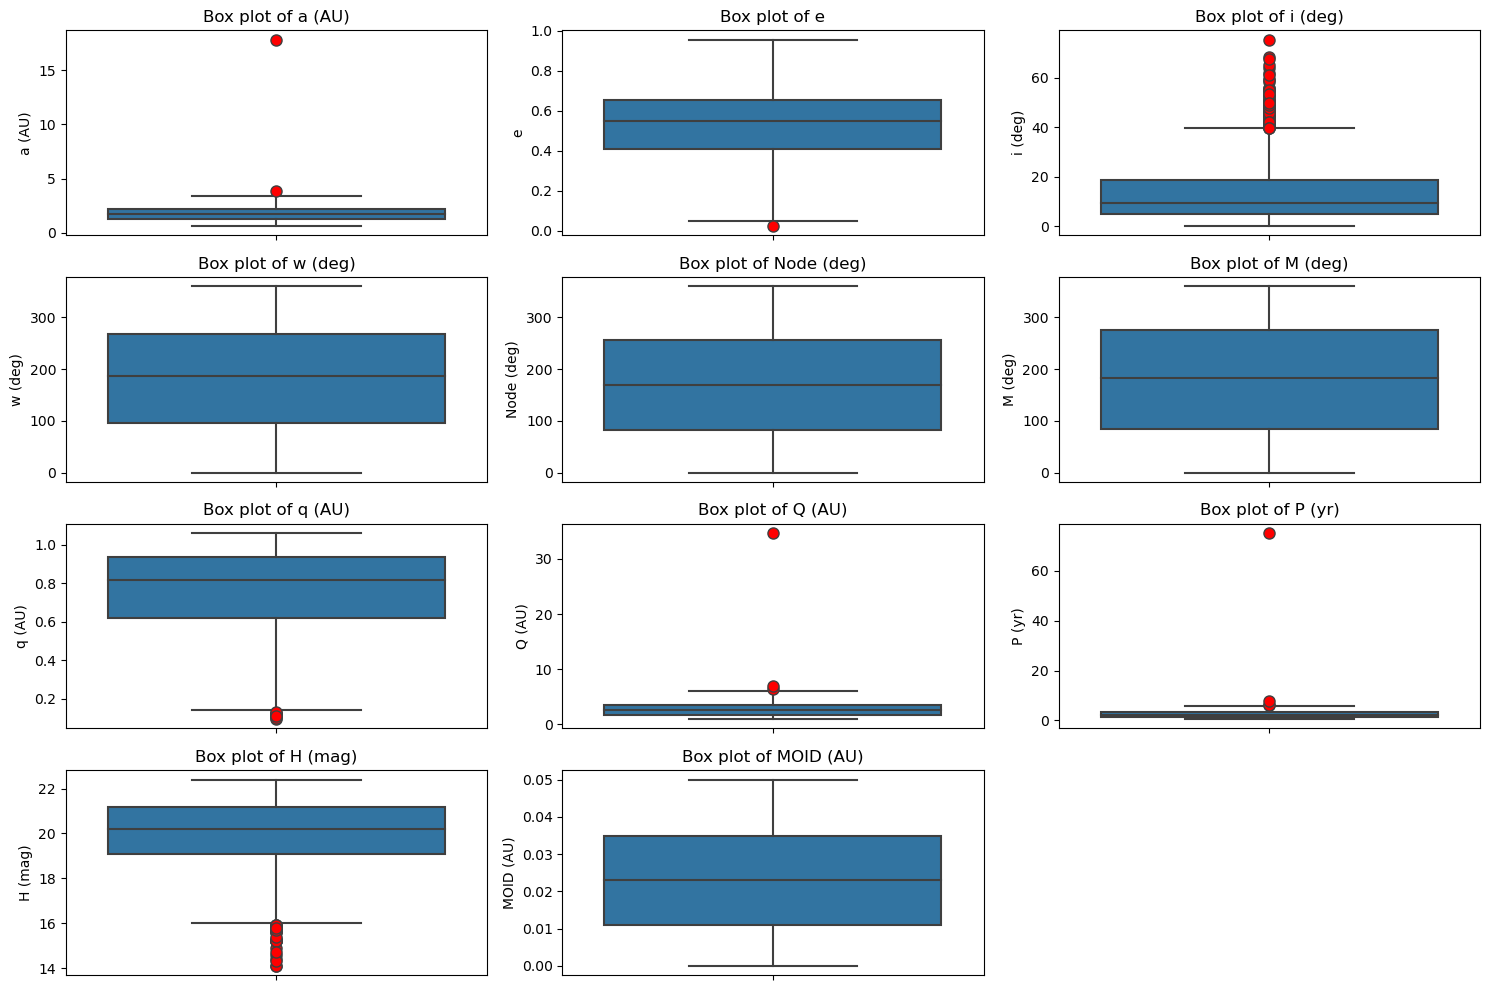

In [18]:
plt.figure(figsize = (15, 10))

for i, column in enumerate(numeric_data, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(data = data, y = column, flierprops = {'marker' : 'o', 'markerfacecolor' : 'red', 'markersize' : 8})
    plt.title(f'Box plot of {column}')
    
plt.tight_layout()
plt.show();

In [19]:
#radi se o svemiru - i ono sto izgleda kao greska ne znamo da l je greska jer je svemir u pitanju ali 
#ajde izbacicu autlajere
#izbacivanje outlajera iz a kolone
data['a (AU)'].describe()

count    1748.000000
mean        1.745759
std         0.690729
min         0.635223
25%         1.265084
50%         1.698290
75%         2.179176
max        17.818679
Name: a (AU), dtype: float64

In [20]:
data[data['a (AU)'] > 15]

a (AU)         e    i (deg)     w (deg)  Node (deg)    M (deg)  \
654  17.818679  0.946101  19.370544  332.891363   49.304199  83.055105   

     q (AU)  Q (AU)  P (yr)  H (mag)  MOID (AU) class  
654  0.9604   34.68   75.22     17.2   0.020649  APO*

In [21]:
data = data[data['a (AU)'] < 15]

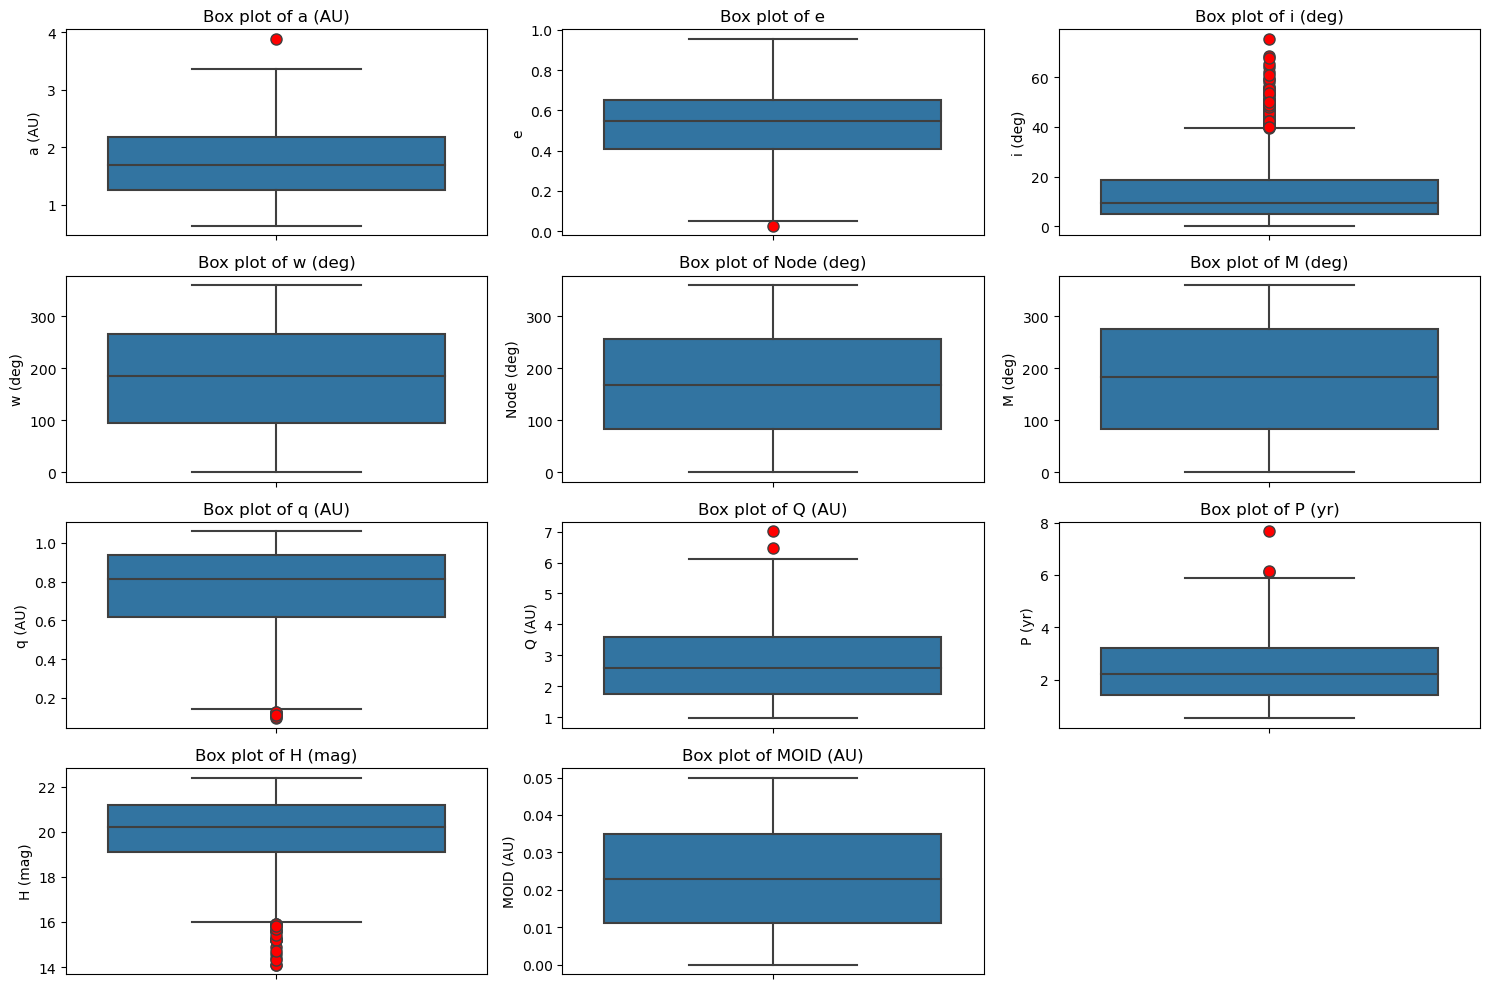

In [22]:
plt.figure(figsize = (15, 10))

for i, column in enumerate(numeric_data, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(data = data, y = column, flierprops = {'marker' : 'o', 'markerfacecolor' : 'red', 'markersize' : 8})
    plt.title(f'Box plot of {column}')
    
plt.tight_layout()
plt.show();

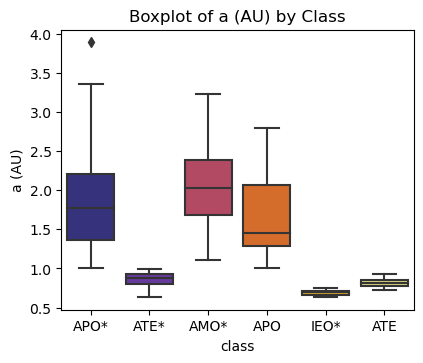

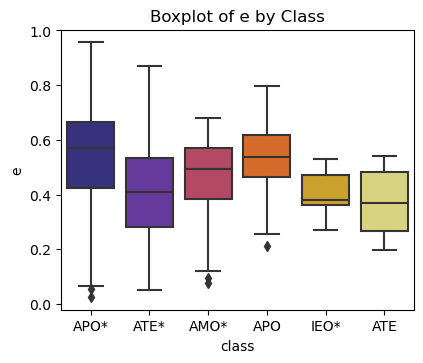

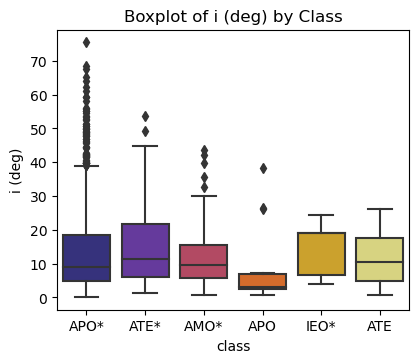

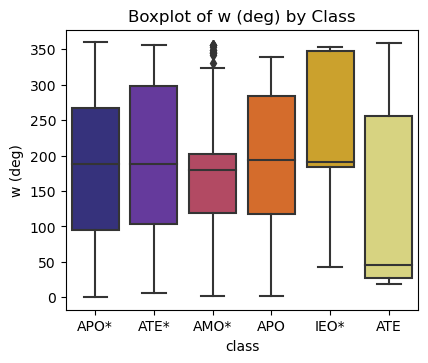

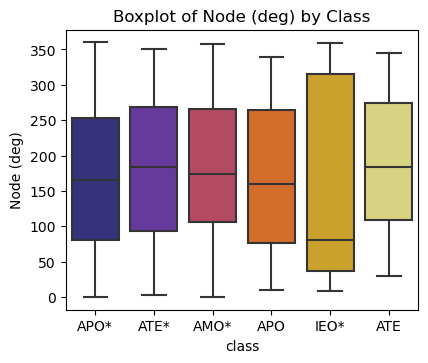

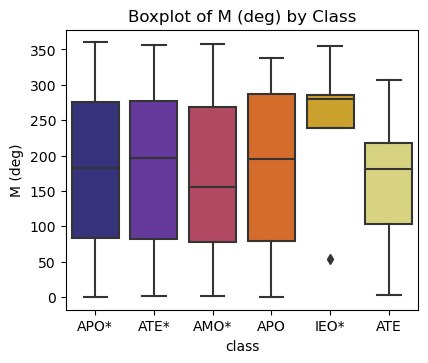

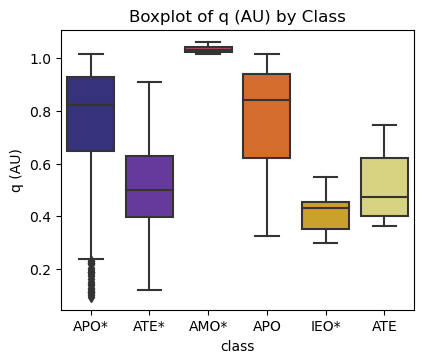

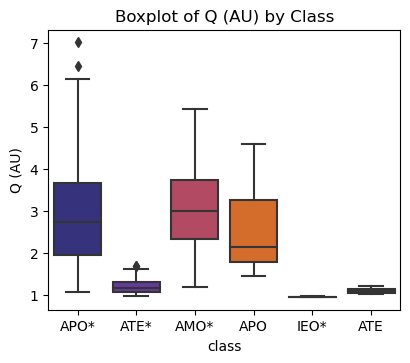

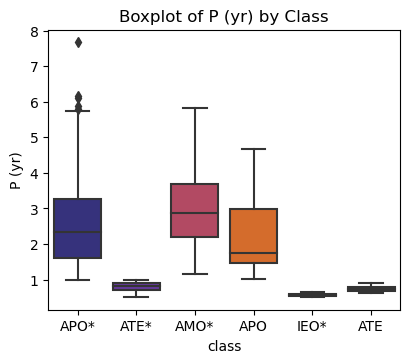

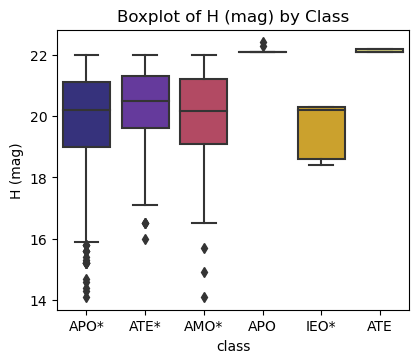

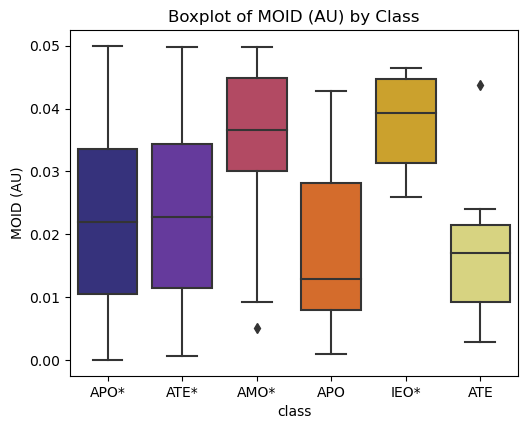

In [23]:
numerical_columns = data.iloc[:, :11].columns.to_list()

# Define the number of rows and columns for subplots
num_rows = 2
num_cols = 2
idx = 1

# Create a loop to generate boxplots for each numerical column
for column_name in numerical_columns:
    # Create a new subplot for each column
    plt.figure(figsize=(10, 8))
    if(idx > 4):
        idx = 1
    plt.subplot(num_rows, num_cols, idx)
    idx += 1 
    
    # Generate a boxplot
    sns.boxplot(x='class', y=column_name, palette='CMRmap', data=data)
    
    # Set titles and labels
    plt.title(f'Boxplot of {column_name} by Class')
    plt.xlabel('class')
    plt.ylabel(column_name)

# Adjust layout and show the plots
plt.tight_layout()
plt.show()



In [24]:
#vrednosti outlajera i za ostale kolone su bile u okviru te instance koju smo izbacili

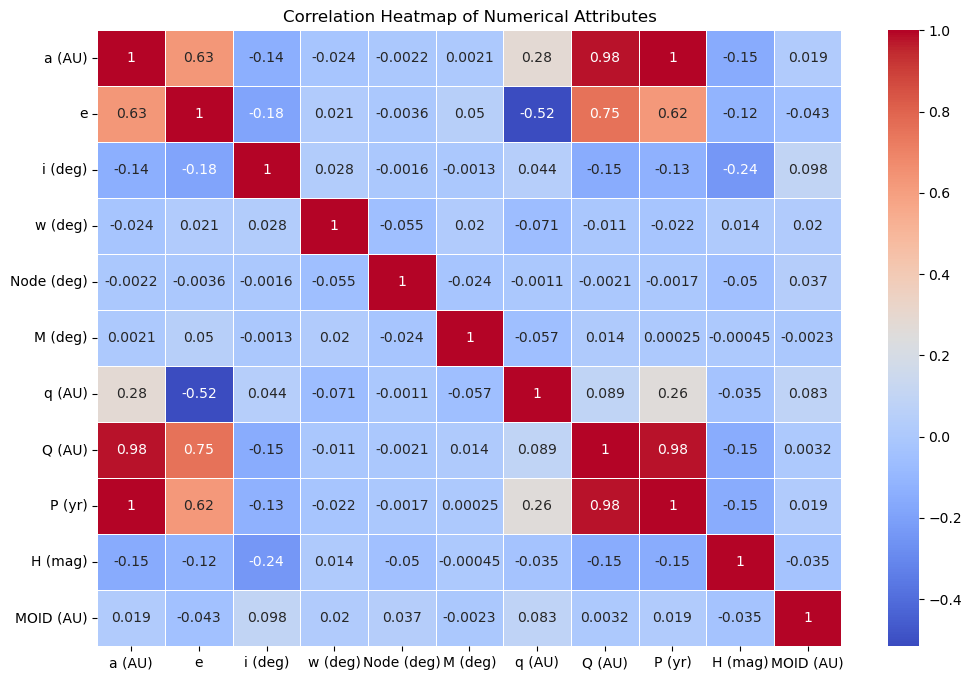

In [25]:
numerical_attributes = data.select_dtypes(include=['number'])

correlation_matrix = numerical_attributes.corr()

plt.figure(figsize=(12, 8))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

plt.title('Correlation Heatmap of Numerical Attributes')
plt.show()

In [26]:
#postoje dve dosta jake korelacije, hajde da ih vidimo bolje

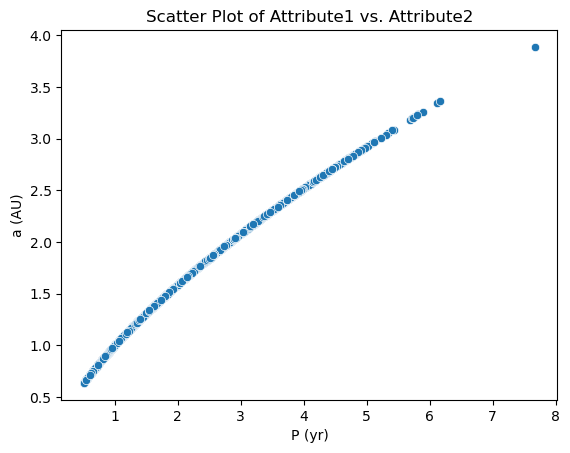

In [27]:
sns.scatterplot(data=data, x='P (yr)', y='a (AU)')
plt.title('Scatter Plot of Attribute1 vs. Attribute2')
plt.show()

In [28]:
data['a (AU)'].corr(data['P (yr)'], method='spearman')

0.9999942316376684

In [29]:
#korelacija izmedju ova dva atributa je skoro 100% -> mozemo odbaciti kolonu P (yr)
data.drop(['P (yr)'], axis=1, inplace = True)

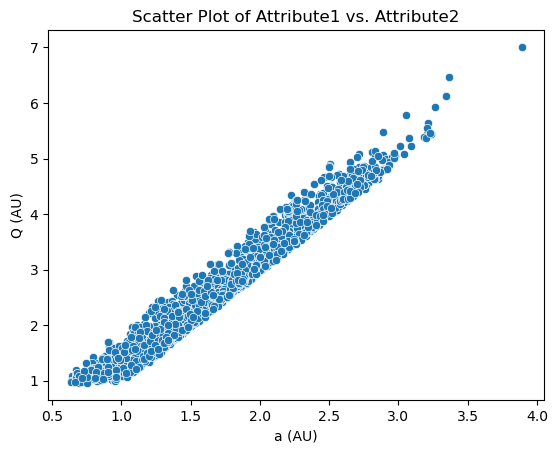

In [30]:
sns.scatterplot(data=data, x='a (AU)', y='Q (AU)')
plt.title('Scatter Plot of Attribute1 vs. Attribute2')
plt.show()

In [31]:
data['a (AU)'].corr(data['Q (AU)'], method='spearman')

0.9822093247055251

In [32]:
#korelacija izmedju ova dva atributa je preko 98% i zato mozemo izbaciti i atribut Q
#data.drop(['Q (AU)'], axis=1, inplace = True)
#data

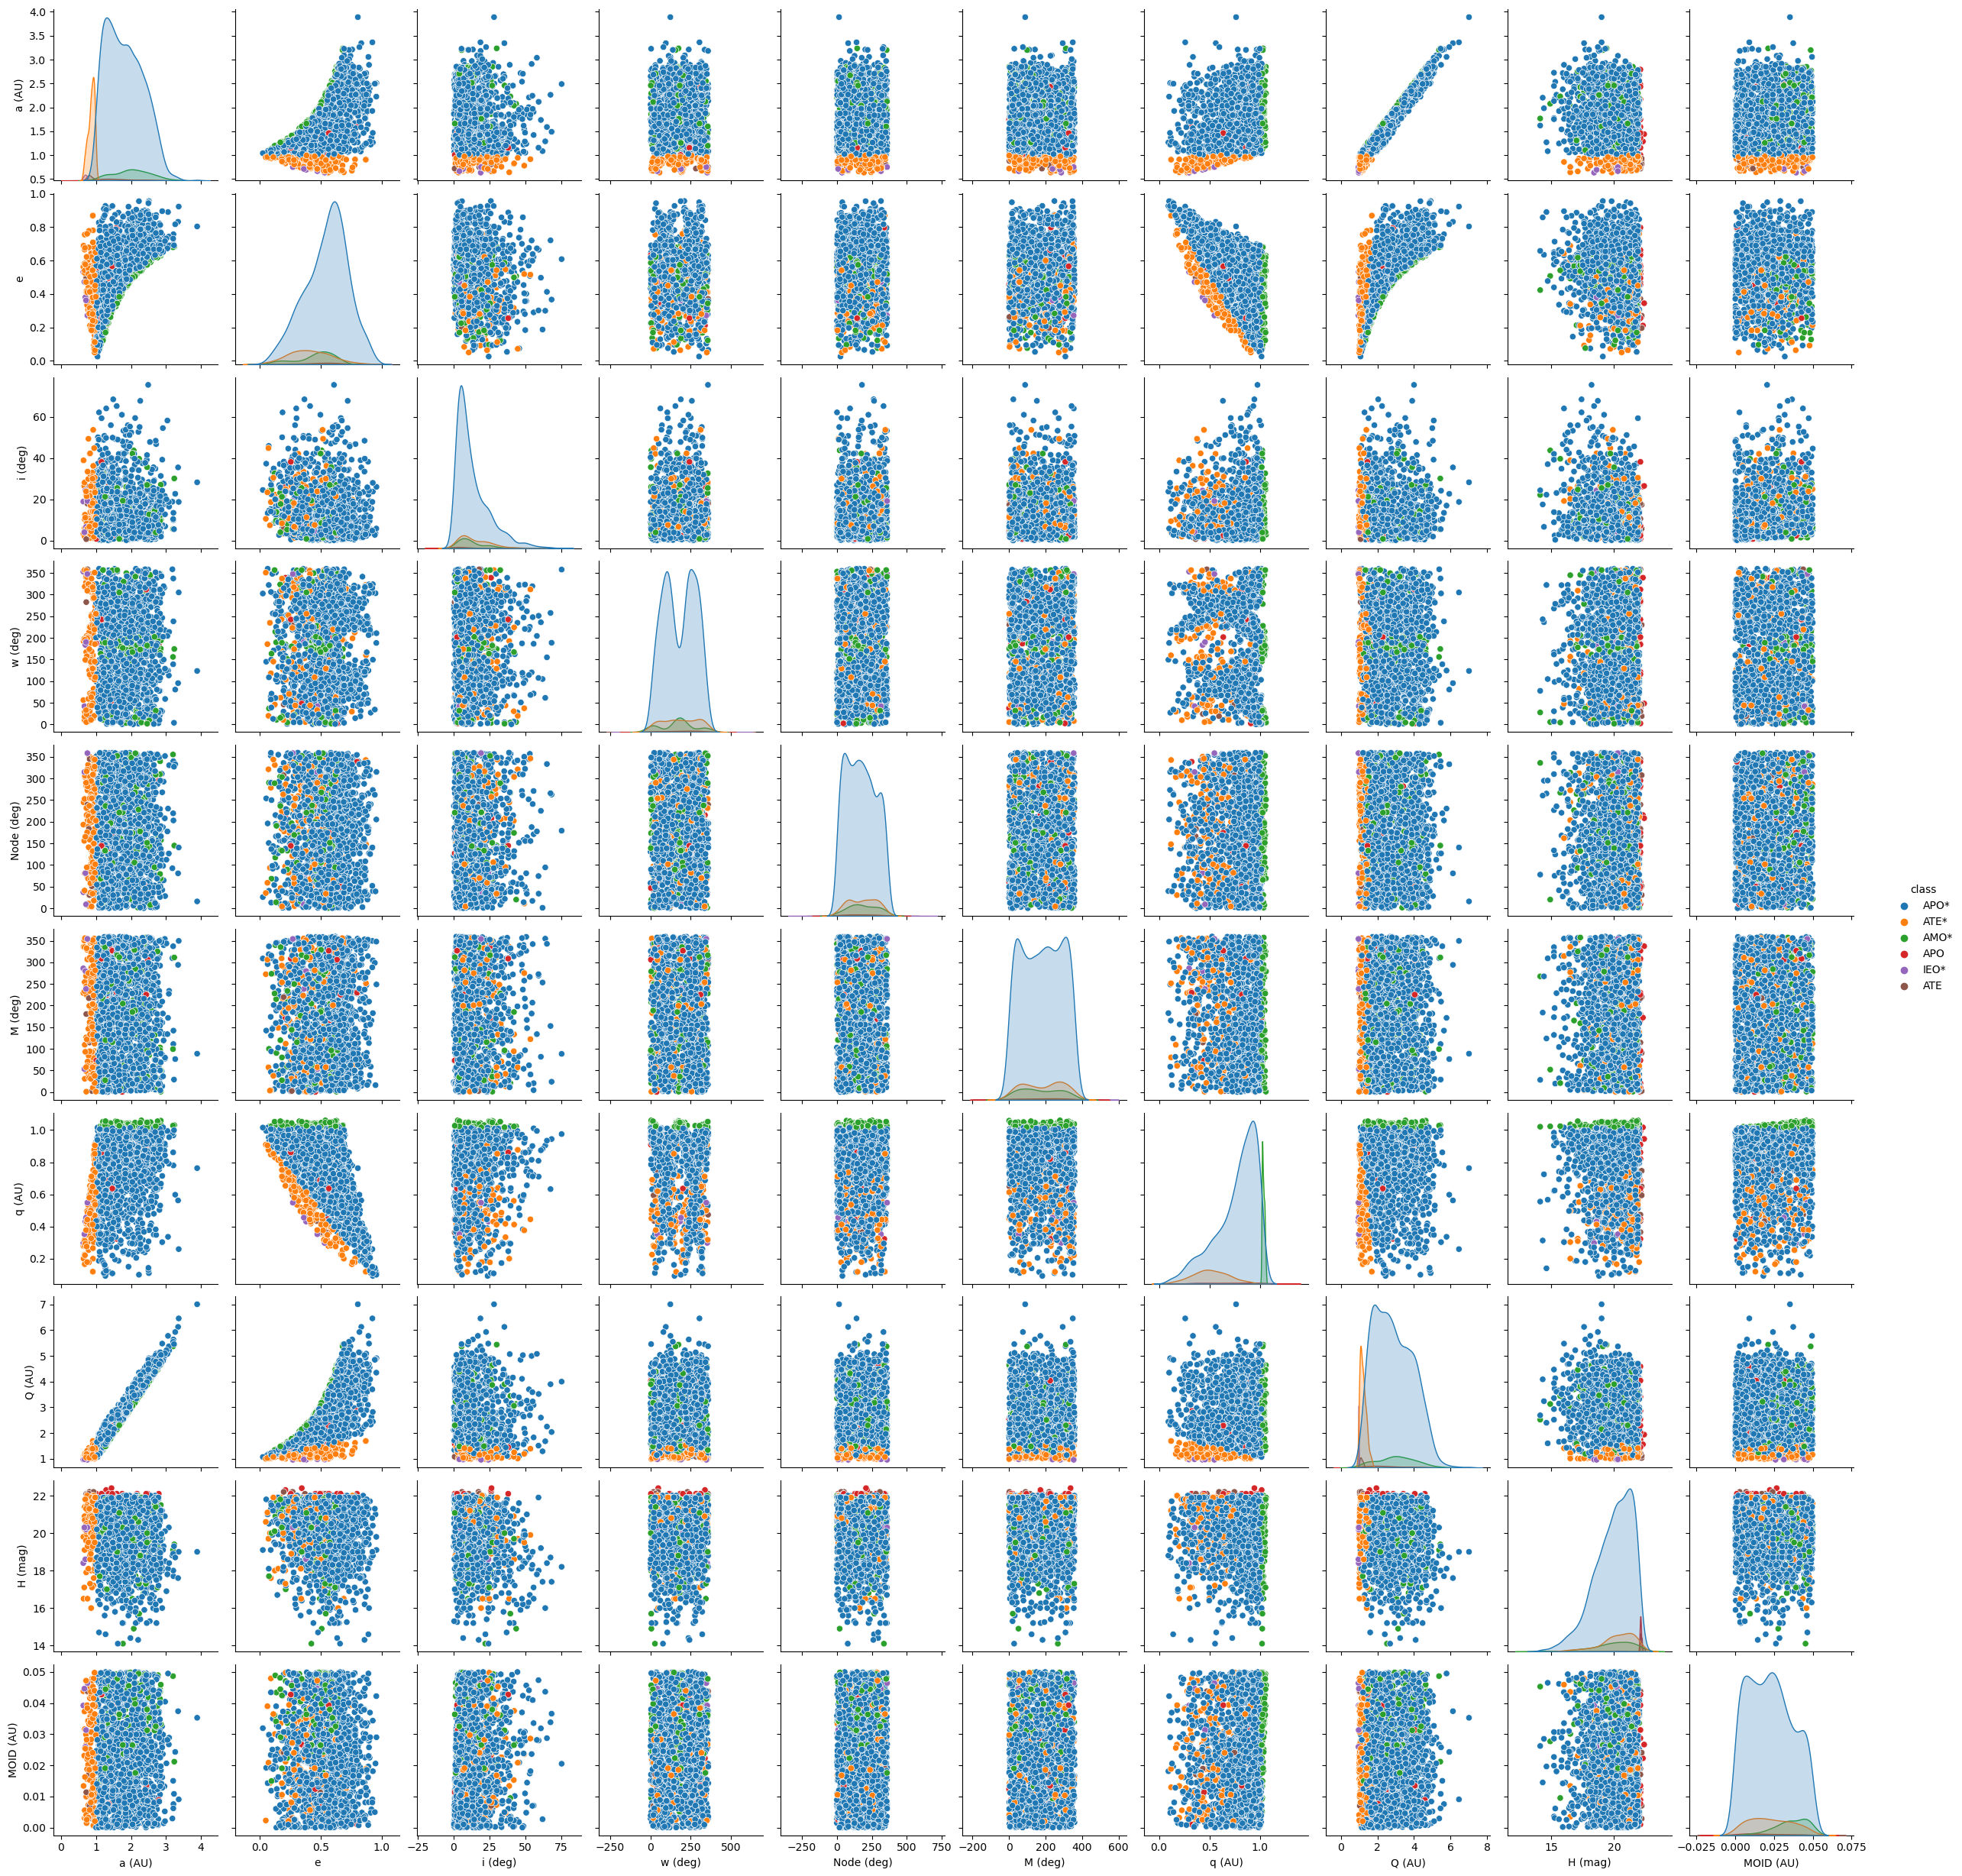

In [33]:
sns.pairplot(data=data, hue='class');

In [34]:
data.to_csv('data_preprocessed.csv', index=False)